# Benchmark

In this notebook, we will benchmark some Resnet Models at different depths. There are quite some hyperparameters we tried on. All benchmark below are done with bottleneck layer at width 40 and 16-layer for simplicity. 

In [1]:
# ============== Click Please.Imports
import sys
import glob
import gc


import random
random.seed(0)
import pandas as pd

import torch
import seaborn as sns

import matplotlib.pyplot as plt



import tqdm



# ================
# Torch related
# ==============
import torch 
from torch import nn



import pytorch_lightning as pl
import torchmetrics

# Turn on cuda optimizer
print(torch.backends.cudnn.is_available())
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
# disable debugs NOTE use only after debugging
torch.autograd.set_detect_anomaly(False)
torch.autograd.profiler.profile(False)
torch.autograd.profiler.emit_nvtx(False)
# Disable gradient tracking
torch.no_grad()


# =============
# NN
# =================
sys.path.append('../')
from NucleicNet.DatasetBuilding.util import *
from NucleicNet.DatasetBuilding.commandReadPdbFtp import ReadBCExternalSymmetry, MakeBcClanGraph
from NucleicNet.DatasetBuilding.commandDataFetcher import FetchIndex, FetchTask, FetchDataset
from NucleicNet.DatasetBuilding.commandBenchmark import BenchmarkWrapper
from NucleicNet import Burn, Fuel
import NucleicNet.Burn.M1
import NucleicNet.Burn.util





%config InlineBackend.figure_format = 'svg'

sns.set_context("notebook")




True


# Benchmarking a 16-layers Resnet

The following section is a 3 fold cross-validation of all members of the clan. It will report `UserWarning: 4 nan values found in confusion matrix have been replaced with zeros` when some classes are missing (e.g. in this case one class is missing in the structure).  In some case, the cuda asynchronization seems to be problematic and complaining out of memory problem, but nevertheless very few instances occurred. No panic. Several performance metrics are evaluated along the way

* Top1 accuracy/precision/recall (macro/micro/class-weighted)
* Top2 accuracy/precision/recall (macro/micro/class-weighted)
* Confusion matrix

The dataframe containing the performance is pickled at `../Benchmark/DfBenchmark__*.pkl`. For a 96-depth model it will take an hour to complete the benchmarking.

Getting TrainValTest batches


  0%|          | 0/24 [00:00<?, ?it/s]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 4 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 62%|██████▎   | 15/24 [02:59<01:43, 11.55s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 12 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 83%|████████▎ | 20/24 [04:36<01:25, 21.32s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 8 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
100%|██████████| 75/75 [16:13<00:00, 12.98s/it]
180it [00:00, 6538.45it/s]


Getting TrainValTest batches


  0%|          | 0/36 [00:00<?, ?it/s]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 8 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 17%|█▋        | 6/36 [01:04<05:38, 11.30s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 4 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 33%|███▎      | 12/36 [02:14<04:27, 11.16s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 12 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
100%|██████████| 79/79 [14:43<00:00, 11.18s/it]
180it [00:00, 6837.61it/s]


Getting TrainValTest batches


  4%|▍         | 2/51 [00:25<10:08, 12.42s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 4 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 53%|█████▎    | 27/51 [04:55<04:15, 10.63s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 8 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
 73%|███████▎  | 37/51 [06:39<02:28, 10.58s/it]/home/homingla/Software/anaconda3/envs/Nucl/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: 12 nan values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)
100%|██████████| 67/67 [12:19<00:00, 11.04s/it]
180it [00:00, 6877.10it/s]


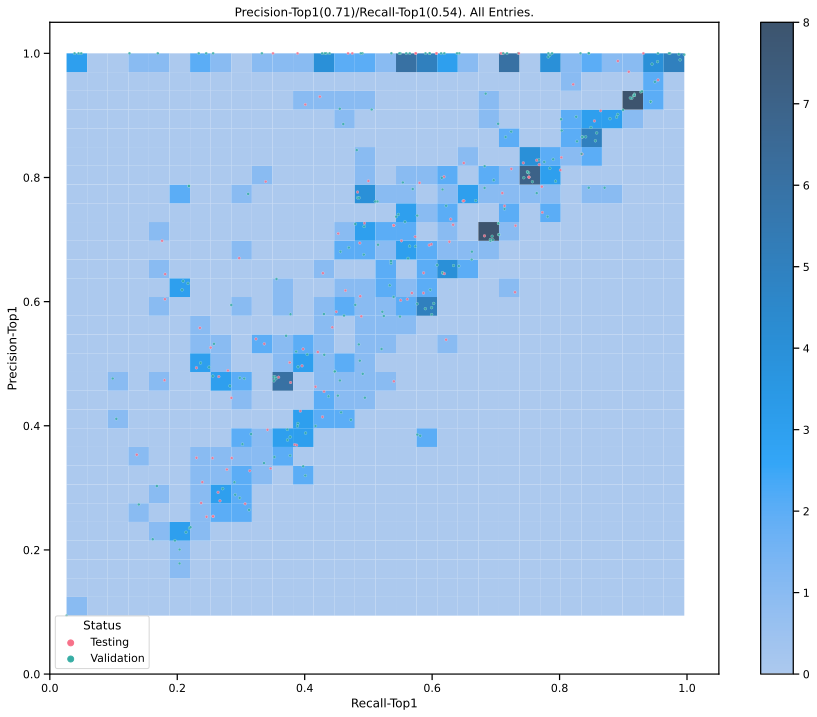

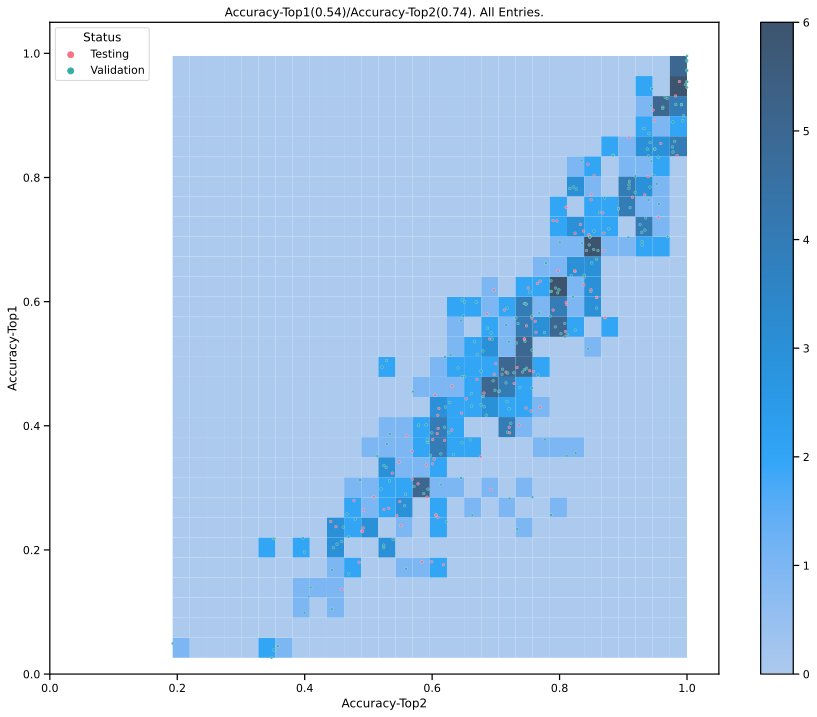

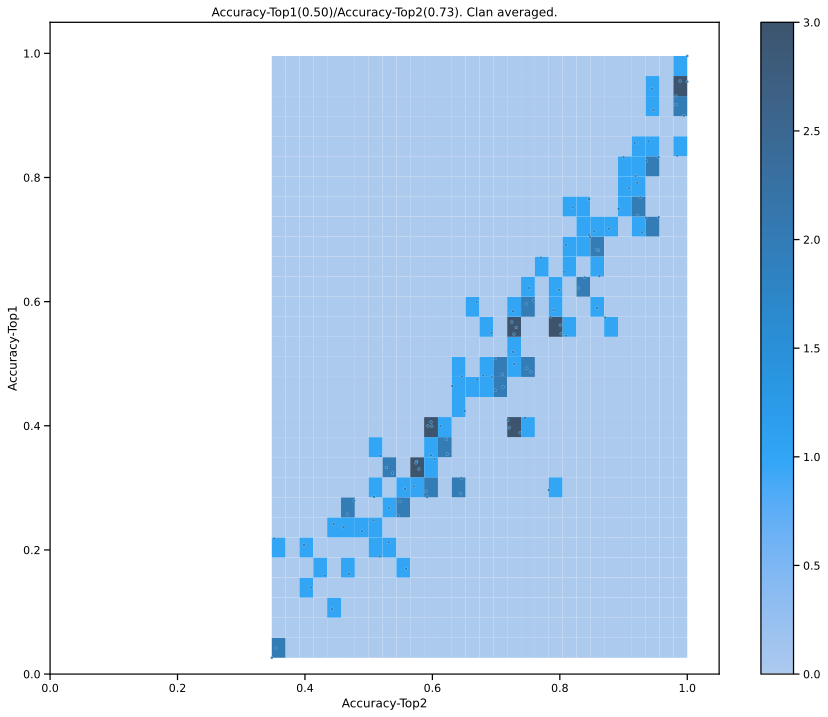

In [2]:
BenchmarkWrapperC = BenchmarkWrapper(   DIR_Benchmark = '../Benchmark/',
                                        DIR_Models = "../Models/",
                                        OutputKeyword = "AUCG-9CV",
                                        Checkpointlist = [
                                            # NOTE depth 16
                                            "../Models/AUCG-9CV_AUCG-9CV/370_371/checkpoints/epoch=26-step=45546-hp_metric=0.5091428756713867.ckpt",
                                            "../Models/AUCG-9CV_AUCG-9CV/374_375/checkpoints/epoch=26-step=45937-hp_metric=0.4786857068538666.ckpt",
                                            "../Models/AUCG-9CV_AUCG-9CV/378_379/checkpoints/epoch=27-step=46676-hp_metric=0.4912857115268707.ckpt",

                                        ])
grandbenchmark_df = BenchmarkWrapperC.Run()

# TODO Save the benchmark in a folder
# TODO Select best for multistate model
# TODO Organise the clans produce an average with a larger dot
Weak_Training = grandbenchmark_df.loc[(grandbenchmark_df['Status'] == 'TrainingValidation') &(grandbenchmark_df['Accuracy-Top1'] < 0.5)][['Pdbid','Accuracy-Top1' ]]
#Weak_Testing = grandbenchmark_df.loc[(grandbenchmark_df['Status'] == 'Testing') &(grandbenchmark_df['Accuracy-Top1'] < 0.5)]#[['Pdbid','Accuracy-Top1' ]]
#grandbenchmark_df


# ===============================
# Plot all
# ===============================
plt.figure(figsize = (15,12))
g = sns.histplot(data=grandbenchmark_df, y="Precision-Top1", x="Recall-Top1", kde=False, bins = 30, palette='YlGnBu', thresh = None, cbar = True)
sns.scatterplot(data=grandbenchmark_df, y="Precision-Top1", x="Recall-Top1", 
                marker = 'o', s = 8.0, hue = 'Status', palette='husl', alpha = 0.8)

plt.title("Precision-Top1(%.2f)/Recall-Top1(%.2f). All Entries." %(grandbenchmark_df["Precision-Top1"].median(),grandbenchmark_df["Recall-Top1"].median() ))
plt.xlim((0,1.05))
plt.ylim((0,1.05))
plt.show()

plt.figure(figsize = (15,12))
g = sns.histplot(data=grandbenchmark_df, y="Accuracy-Top1", x="Accuracy-Top2", kde=False, bins = 30, palette='YlGnBu', thresh = None, cbar = True)
sns.scatterplot(data=grandbenchmark_df, y="Accuracy-Top1", x="Accuracy-Top2", 
                marker = 'o', s = 8.0, hue = 'Status', palette='husl', alpha = 0.8)

plt.title("Accuracy-Top1(%.2f)/Accuracy-Top2(%.2f). All Entries." %(grandbenchmark_df["Accuracy-Top1"].median(),grandbenchmark_df["Accuracy-Top2"].median() ))
plt.xlim((0,1.05))
plt.ylim((0,1.05))
plt.show()

# ===================
# Clan averaged
# ==================

grandbenchmark_df_ClanGrouped = grandbenchmark_df.groupby(by=["Clan"] ).agg('mean').reset_index()


plt.figure(figsize = (15,12))
g = sns.histplot(data=grandbenchmark_df_ClanGrouped, y="Accuracy-Top1", x="Accuracy-Top2", kde=False, bins = 30, palette='YlGnBu', thresh = None, cbar = True)
sns.scatterplot(data=grandbenchmark_df_ClanGrouped, y="Accuracy-Top1", x="Accuracy-Top2", 
                marker = 'o', s = 8.0, palette='husl', alpha = 0.8)

plt.title("Accuracy-Top1(%.2f)/Accuracy-Top2(%.2f). Clan averaged." %(grandbenchmark_df_ClanGrouped["Accuracy-Top1"].median(),grandbenchmark_df_ClanGrouped["Accuracy-Top2"].median()))
plt.xlim((0,1.05))
plt.ylim((0,1.05))
plt.show()


#print(Weak_Testing)

# Epilogue

Here we presented a model with the same architecture as stated in our paper, but the accuracy is slightly improved 0.50 (here 2021) versus 0.45 (2019) and is on par with the best ensemble model Nucleic_en (0.49) in the suppplementary of the paper. This maybe attributed to the improved training strategy including 

* Use of neighborhood and regular label smoothing
* Ghost batch normalisation
* AdamW
* Cyclic learning rate scheduler

Several further refinement on training strategies and model may be done while still constraining ourselves within a ResNet architecture. We also attempted a version with Gelu, which shows an even better performance in AUCG but almost the same performance in SXPR. But let's call it a day here. Don't forget to test SXPR!